<font color=black size=5 face=Arial><center>**Predict Household Electricity Consumption with Machine Learning**</font></center>

<font color=black size=3 face=Arial><center>Joy(Ruoqian) Wang</font></center>
<font color=black size=3 face=Arial><center>July 2022</font></center>

# Introduction

<font color=black size=3 face=Arial>
    Electricity consumption is among one of the essential topics of energy systems. It is critical for short-term resources allocation and long-term planning for new generation. It also serves as an good indicator of technology development and lifestyle changes. </font>

<font color=black size=3 face=Arial>In this project, yearly household eletricity consumption will be predicted based on a dataset from Residential Energy Consumption Survey conducted in 2009 in US.  </font>
<font color=black size=3 face=Arial>Dataset can be found at https://www.eia.gov/consumption/residential/data/2020/index.php?view=microdata </font>

<font color=black size=3 face=Arial>The objective of this project is to use energy/electricity usage related charactistics like housing unit, usage patterns, and household demographics to build a model that will allow us to understand the status and project future consumption trends, as a consequence, to make better decisions in terms of cost and energy efficiency. </font>

<font color=black size=3 face=Arial>Specifically, this goal is achieved as the following steps:</font>  
     <font color=black size=3 face=Arial>1. Get the data ready through data engineering </font>  
     <font color=black size=3 face=Arial>2. Reduce dimensionality of data</font>  
     <font color=black size=3 face=Arial>3. Further selection and engineering of important independent features for electricity consumption modelling</font>   
     <font color=black size=3 face=Arial>4. Model selection : Artificial Neural Networks (ANN) for Regression and fitting </font>  
     <font color=black size=3 face=Arial>5. Model performance evaluation </font>  
     <font color=black size=3 face=Arial>6. Conclusion and discussion </font>

# Data Engineering

## 1. Preparation and data reading

<font color=black size=3 face=Arial> This is section is also completed with checking and understanding corresponding files provided by RECS -- "Layout file", which contains descriptive labels and formats for each data variable; The "Variable and response codebook" contains descriptive labels for variables. </font>

<font color=black size=3 face=Arial> There are 12083 records and 940 columns/variables. There is decent amount of columns are actually not containing any practical information -- they are imputation flags, indicating if this characristic's records got missing data replaced with substituted values. Also, by checking the codebook, most of columns use '-2' indicating 'Not Applicable'. </font>

In [1]:
# Load Modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
df_2009raw = pd.read_csv('/Joy Wang/Data Science Projects/electricity consumption predict/recs2009_public.csv')
df_layout = pd.read_csv('/Joy Wang/Data Science Projects/electricity consumption predict/public_layout.csv')

C:\Users\ruoqi\AppData\Local\Temp\ipykernel_10000\1598959642.py:2: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2009raw = pd.read_csv('/Joy Wang/Data Science Projects/electricity consumption predict/recs2009_public.csv')


In [3]:
# Read Data
df_2009raw.info()
df_2009raw.describe()
df_2009raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, DOEID to DesignDBT1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [5]:
# Extract column names
index_columns = df_2009raw.columns
type(index_columns)

pandas.core.indexes.base.Index

In [6]:
# Extract and understand column 
list_columns = df_2009raw.columns.tolist()
series_columns = index_columns.to_series()
list_columns

['DOEID',
 'REGIONC',
 'DIVISION',
 'REPORTABLE_DOMAIN',
 'TYPEHUQ',
 'NWEIGHT',
 'HDD65',
 'CDD65',
 'HDD30YR',
 'CDD30YR',
 'Climate_Region_Pub',
 'AIA_Zone',
 'METROMICRO',
 'UR',
 'KOWNRENT',
 'CONDCOOP',
 'YEARMADE',
 'YEARMADERANGE',
 'OCCUPYYRANGE',
 'CONVERSION',
 'ORIG1FAM',
 'LOOKLIKE',
 'NUMFLRS',
 'NUMAPTS',
 'WALLTYPE',
 'ROOFTYPE',
 'STUDIO',
 'NAPTFLRS',
 'STORIES',
 'TYPEHUQ4',
 'BEDROOMS',
 'NCOMBATH',
 'NHAFBATH',
 'OTHROOMS',
 'TOTROOMS',
 'CELLAR',
 'CRAWL',
 'CONCRETE',
 'BASEFIN',
 'FINBASERMS',
 'BASEHEAT',
 'BASEHT2',
 'PCTBSTHT',
 'BASECOOL',
 'BASECL2',
 'PCTBSTCL',
 'BASEUSE',
 'ATTIC',
 'ATTICFIN',
 'FINATTRMS',
 'ATTCHEAT',
 'ATTCHT2',
 'PCTATTHT',
 'ATTCCOOL',
 'ATTCCL2',
 'PCTATTCL',
 'ATTICUSE',
 'PRKGPLC1',
 'SIZEOFGARAGE',
 'GARGLOC',
 'GARGHEAT',
 'GARGCOOL',
 'PRKGPLC2',
 'SIZEOFDETACH',
 'OUTLET',
 'ZKOWNRENT',
 'ZCONDCOOP',
 'ZYEARMADE',
 'ZYEARMADERANGE',
 'ZOCCUPYYRANGE',
 'ZCONVERSION',
 'ZORIG1FAM',
 'ZLOOKLIKE',
 'ZNUMFLRS',
 'ZNUMAPTS',
 'ZWA

## 2. Data cleaning

<font color=black size=3 face=Arial> At the beginning of data cleaning, I went through its NULL values and N/A values as well as imputation indicators. This dataset does not have any NULL values but it contains significant amount of '-2', which technically may or may not refer as NULL or N/A or some other specific information. To simplify the process due to time manner, i assumed all '-2' indicating not useable values -- for further analysis keeping these many N/A would give us wrong message in modelling. Same for imputation flag columns, they are also considered as useless to affect electricity usage in each household. Therefore, I will remove thoes values and columns from the data.</font>

In [7]:
# Extract colmun names of imputation indicator
imputation_flags = series_columns[series_columns.str.startswith('Z')]
print(imputation_flags.index.tolist())

['ZKOWNRENT', 'ZCONDCOOP', 'ZYEARMADE', 'ZYEARMADERANGE', 'ZOCCUPYYRANGE', 'ZCONVERSION', 'ZORIG1FAM', 'ZLOOKLIKE', 'ZNUMFLRS', 'ZNUMAPTS', 'ZWALLTYPE', 'ZROOFTYPE', 'ZSTUDIO', 'ZNAPTFLRS', 'ZSTORIES', 'ZTYPEHUQ4', 'ZBEDROOMS', 'ZNCOMBATH', 'ZNHAFBATH', 'ZOTHROOMS', 'ZCELLAR', 'ZCRAWL', 'ZCONCRETE', 'ZBASEFIN', 'ZFINBASERMS', 'ZBASEHEAT', 'ZBASEHT2', 'ZPCTBSTHT', 'ZBASECOOL', 'ZBASECL2', 'ZPCTBSTCL', 'ZBASEUSE', 'ZATTIC', 'ZATTICFIN', 'ZFINATTRMS', 'ZATTCHEAT', 'ZATTCHT2', 'ZPCTATTHT', 'ZATTCCOOL', 'ZPCTATTCL', 'ZATTCCL2', 'ZATTICUSE', 'ZPRKGPLC1', 'ZSIZEOFGARAGE', 'ZGARGLOC', 'ZGARGHEAT', 'ZGARGCOOL', 'ZPRKGPLC2', 'ZSIZEOFDETACH', 'ZSTOVEN', 'ZSTOVENFUEL', 'ZSTOVE', 'ZSTOVEFUEL', 'ZOVEN', 'ZOVENFUEL', 'ZOVENUSE', 'ZOVENCLN', 'ZTYPECLN', 'ZMICRO', 'ZAMTMICRO', 'ZDEFROST', 'ZOUTGRILL', 'ZOUTGRILLFUEL', 'ZTOPGRILL', 'ZSTGRILA', 'ZTOASTER', 'ZNUMMEAL', 'ZFUELFOOD', 'ZCOFFEE', 'ZNUMFRIG', 'ZTYPERFR1', 'ZSIZRFRI1', 'ZREFRIGT1', 'ZICE', 'ZAGERFRI1', 'ZTYPERFR2', 'ZSIZRFRI2', 'ZREFRIGT2', 'ZM

In [8]:
# Checking if there is any null values
df_2009raw.isnull().sum().sum()

0

<font color=black size=3 face=Arial> If more than 50% of the 12083 records in a particular column are N/A values, then it is identified as an variable that would not contribute to the prediction. </font>

In [9]:
# Checking N/A values: '-2'
Counting_NA = df_2009raw[df_2009raw == -2].count()

# Find variables that contain more than half of records are not applicable -- Not valuable
NA_morethanhalf = Counting_NA[Counting_NA > 6041].sort_values(ascending=False)
print(NA_morethanhalf)

AGEHHMEMCAT14    12079
AGEHHMEMCAT13    12079
AGEHHMEMCAT12    12077
AGEHHMEMCAT11    12072
AGEHHMEMCAT10    12064
                 ...  
TVTYPE3           6556
PLAYSTA3          6556
CABLESAT3         6556
DIGITSTB3         6556
HELPHT            6443
Length: 210, dtype: int64


In [10]:
# Drop columns/variables that would not be valuabe to predicting electricity consumption 
df_2009clean = df_2009raw.drop(labels=NA_morethanhalf.index.union(imputation_flags.index),axis=1)
print(df_2009clean)

       DOEID  REGIONC  DIVISION  REPORTABLE_DOMAIN  TYPEHUQ   NWEIGHT  HDD65  \
0          1        2         4                 12        2   2471.68   4742   
1          2        4        10                 26        2   8599.17   2662   
2          3        1         1                  1        5   8969.92   6233   
3          4        2         3                  7        2  18003.64   6034   
4          5        1         1                  1        3   5999.61   5388   
...      ...      ...       ...                ...      ...       ...    ...   
12078  12079        2         3                  9        2  10219.80   7671   
12079  12080        3         7                 21        4   8689.07   2085   
12080  12081        2         4                 10        2   4697.21   7935   
12081  12082        4         8                 23        2  13155.68   5834   
12082  12083        4        10                 26        2   7703.43   2806   

       CDD65  HDD30YR  CDD30YR  ...  SC

In [11]:
# Check out this cleaned data
df_2009clean.info()
df_2009clean.describe()
df_2009clean.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 371 entries, DOEID to DesignDBT1
dtypes: float64(49), int64(319), object(3)
memory usage: 34.2+ MB


,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALENG,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,0,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,3,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,3,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,0,5A,2251,0,5426,0.61,4,50,13,90


## 3. Reduce dimensionality and further data processing

In [12]:
df_layout_clean = df_layout.loc[df_layout['Variable Name'].isin(df_2009clean.columns.to_series())]
print(df_layout_clean)
df_layout_clean.to_csv('/Joy Wang/Data Science Projects/electricity consumption predict/public_layout_clean.csv')

         Variable Name                                     Variable Label  \
0                DOEID              Unique identifier for each respondent   
1              REGIONC                                      Census Region   
2             DIVISION                                    Census Division   
3    REPORTABLE_DOMAIN             Reportable states and groups of states   
4              TYPEHUQ                               Type of housing unit   
..                 ...                                                ...   
935                WSF    Weather & shielding factor for the housing unit   
936             OA_LAT  Annual value for latent heat infiltration from...   
937                GWT  Annual average ground water temperature (F) fo...   
938        DesignDBT99  Dry bulb design temperature (F) expected to be...   
939         DesignDBT1  Dry bulb design temperature (F) expected to be...   

     Variable Order in File Variable Type  Length  
0                      

<font color=black size=3 face=Arial> After removing all the non-significant variables, there are 370 variables left in this dataset. It is now easier to review them with layout/description in Excel but still it is necessary to reduce more dimensions in a more practical sense. </font>

<font color=black size=3 face=Arial> Because of the time constraints, I reviewed 370 variables with their description in excel and picked 15 veriables as features of inetrest with consideration of demographics/household, weather/climate and lifestyle/usage pattern. </font>

In [13]:
# Reduce dimension to 15 variables 
df_2009reduced = df_2009clean[
    ['KWH',
    'BEDROOMS', 'MONEYPY', 'NHSLDMEM', 'TYPEHUQ', 'TOTSQFT', 'TOTHSQFT', 'TOTCSQFT',
    'HDD30YR', 'CDD30YR','TEMPNITE',
    'TOTALBTUSPH', 'TOTALBTUCOL', 'TOTALBTUWTH', 'TOTALBTURFG','TOTALBTUOTH']
    ]
print(df_2009reduced)  
df_2009reduced.to_csv('/Joy Wang/Data Science Projects/electricity consumption predict/recs2009_public_reduced15.csv')

         KWH  BEDROOMS  MONEYPY  NHSLDMEM  TYPEHUQ  TOTSQFT  TOTHSQFT  \
0      18466         4       23         4        2     5075      3958   
1       5148         3        9         6        2     3136      2736   
2       2218         1       18         1        5      528       528   
3      10015         3       10         1        2     2023      1623   
4       2869         2       20         1        3     1912      1274   
...      ...       ...      ...       ...      ...      ...       ...   
12078   7647         3       13         1        2     2560       893   
12079   1813        -2        9         1        4      502       502   
12080   9834         4       24         4        2     4581      4181   
12081   4800         3        4         1        2     1728       864   
12082   1764         2        7         2        2     4920      4520   

       TOTCSQFT  HDD30YR  CDD30YR  TEMPNITE  TOTALBTUSPH  TOTALBTUCOL  \
0          3958     4953     1271        68       

In [14]:
# Check out this variables reduced data
df_2009reduced.info()
df_2009reduced.head(5)
df_2009reduced.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   KWH          12083 non-null  int64
 1   BEDROOMS     12083 non-null  int64
 2   MONEYPY      12083 non-null  int64
 3   NHSLDMEM     12083 non-null  int64
 4   TYPEHUQ      12083 non-null  int64
 5   TOTSQFT      12083 non-null  int64
 6   TOTHSQFT     12083 non-null  int64
 7   TOTCSQFT     12083 non-null  int64
 8   HDD30YR      12083 non-null  int64
 9   CDD30YR      12083 non-null  int64
 10  TEMPNITE     12083 non-null  int64
 11  TOTALBTUSPH  12083 non-null  int64
 12  TOTALBTUCOL  12083 non-null  int64
 13  TOTALBTUWTH  12083 non-null  int64
 14  TOTALBTURFG  12083 non-null  int64
 15  TOTALBTUOTH  12083 non-null  int64
dtypes: int64(16)
memory usage: 1.5 MB


,KWH,BEDROOMS,MONEYPY,NHSLDMEM,TYPEHUQ,TOTSQFT,TOTHSQFT,TOTCSQFT,HDD30YR,CDD30YR,TEMPNITE,TOTALBTUSPH,TOTALBTUCOL,TOTALBTUWTH,TOTALBTURFG,TOTALBTUOTH
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.00000
mean,11288.159398,2.773070,13.027394,2.665646,2.659604,2172.352892,1675.956219,1254.239262,4135.146983,1443.503104,65.115286,36863.469006,5750.135811,16265.617314,4241.701564,26874.77547
std,7641.190845,1.217654,6.804078,1.515664,1.192627,1453.742279,1200.819335,1227.949667,2260.543686,1021.748722,14.230370,35583.121163,8458.828563,13552.792061,2656.406897,19867.08782
min,17.000000,-2.000000,1.000000,1.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,33.00000
25%,5837.000000,2.000000,8.000000,2.000000,2.000000,1087.500000,888.000000,264.000000,2224.000000,712.000000,65.000000,8748.500000,485.000000,7710.000000,2466.500000,13936.00000
50%,9623.000000,3.000000,12.000000,2.000000,2.000000,1863.000000,1400.000000,1025.000000,4502.000000,1179.000000,68.000000,27291.000000,2563.000000,12754.000000,3570.000000,23014.00000
75%,14765.000000,3.000000,19.000000,4.000000,3.000000,2816.000000,2160.000000,1830.000000,5854.000000,1842.500000,70.000000,55645.500000,7816.000000,21158.000000,5328.500000,34790.50000
max,150254.000000,13.000000,24.000000,14.000000,5.000000,16122.000000,13776.000000,13776.000000,13346.000000,5357.000000,91.000000,548711.000000,208117.000000,284130.000000,37768.000000,428085.00000


<font color=black size=3 face=Arial>There are still a few 'Not Applicable'/'-2' records in the dimension reduced dataset, for example BEDROOMS and TEMPNITE. It is not a large amount but still they won't contribute to the model. Rows with N/A values will be removed.</font>

In [15]:
# So removing rows with N/A values
temp = df_2009reduced.apply(lambda x: True if -2 in list(x) else False, axis=1)
df_2009rclean = df_2009reduced.drop(temp[temp == True].index)
print(df_2009rclean)

         KWH  BEDROOMS  MONEYPY  NHSLDMEM  TYPEHUQ  TOTSQFT  TOTHSQFT  \
0      18466         4       23         4        2     5075      3958   
1       5148         3        9         6        2     3136      2736   
2       2218         1       18         1        5      528       528   
3      10015         3       10         1        2     2023      1623   
4       2869         2       20         1        3     1912      1274   
...      ...       ...      ...       ...      ...      ...       ...   
12077  16378         3       22         3        2     3822      3422   
12078   7647         3       13         1        2     2560       893   
12080   9834         4       24         4        2     4581      4181   
12081   4800         3        4         1        2     1728       864   
12082   1764         2        7         2        2     4920      4520   

       TOTCSQFT  HDD30YR  CDD30YR  TEMPNITE  TOTALBTUSPH  TOTALBTUCOL  \
0          3958     4953     1271        68       

In [16]:
# 11460 records 
df_2009rclean.describe()
df_2009rclean.head()

,KWH,BEDROOMS,MONEYPY,NHSLDMEM,TYPEHUQ,TOTSQFT,TOTHSQFT,TOTCSQFT,HDD30YR,CDD30YR,TEMPNITE,TOTALBTUSPH,TOTALBTUCOL,TOTALBTUWTH,TOTALBTURFG,TOTALBTUOTH
0,18466,4,23,4,2,5075,3958,3958,4953,1271,68,10873,10471,10128,5171,26363
1,5148,3,9,6,2,3136,2736,2736,2688,143,73,38606,621,30110,4470,29653
2,2218,1,18,1,5,528,528,264,5741,829,65,40248,629,7933,3124,6781
3,10015,3,10,1,2,2023,1623,1623,5781,868,55,40196,3627,6440,5700,20438
4,2869,2,20,1,3,1912,1274,0,5313,797,70,36136,0,13884,1182,8607


<font color=black size=3 face=Arial> Additionally,I also need to make sure only numerical variables are going into machine learning since most machine learning algorithms require numerical values; Therefore, all categorical format attributes in the dataset should be encoded into numerical labels before training the model. Well by checking this recleaned data, luckly i think this dataframe should be good to go they are all numerical format. </font>  

<font color=black size=3 face=Arial> It’s always better to rename the columns and format them to the most readable format which can be understood easily in data interpretation. </font>

In [17]:
# Rename column -- more Readable
colNameDict = {'KWH':'PowerUsage','BEDROOMS':'NumOfBedrooms','MONEYPY':'HouseholdIcome', 
               'NHSLDMEM':'NumOfResidents', 'TYPEHUQ':'TypeOfUnit', 'TOTSQFT':'TotalSQFT', 
               'TOTHSQFT':'HeatSQFT', 'TOTCSQFT':'ColdSQFT','HDD30YR':'Heat30Y', 'CDD30YR':'Cold30Y',
               'TEMPNITE':'NightTemp','TOTALBTUSPH':'HeatUsage', 'TOTALBTUCOL':'ACusage', 
               'TOTALBTUWTH':'WaterheatUsage', 'TOTALBTURFG':'RefriUsage','TOTALBTUOTH':'OthersUsage'}   
df_2009rclean.rename(columns = colNameDict,inplace=True)

# Feature Importance and engineering

<font color=black size=3 face=Arial> Feature Importance refers to techniques that calculate a score for all the input variables for a given model — the scores simply represent the influence or the importance of each variable. A higher score means that the specific variable will have a larger effect on the model. This section is completed by analyzing correlation coefficients and random forest decision tree with exploratory data visualization. </font>

## 1. Pearson's correlation coefficient

<font color=black size=3 face=Arial> Correlation coefficients are used to measure how strong a relationship is between two variables. There are several types of correlation coefficient, but the most popular is Pearson’s. It is a correlation coefficient commonly used in linear regression. </font>  

<font color=black size=3 face=Arial> Correlation coefficient formulas returns a value between -1 and 1, where: </font>  
<font color=black size=3 face=Arial> 1 indicates a strong positive relationship. </font>  
<font color=black size=3 face=Arial>-1 indicates a strong negative relationship. </font>  
<font color=black size=3 face=Arial>A result of zero indicates no relationship at all. </font>  

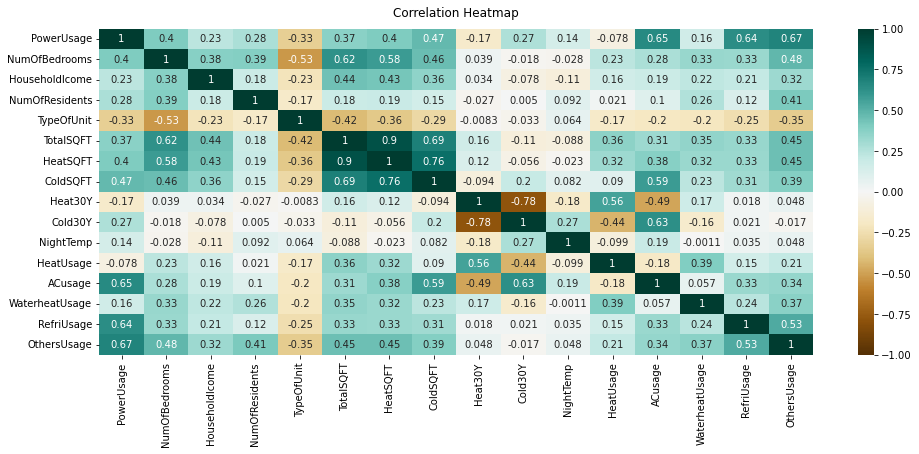

In [18]:
# check simple pairwise correlation -- linear -- EDA
corre_2009rclean = df_2009rclean.corr()

# Visualization -- heat map
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corre_2009rclean,vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [19]:
# Just curious (can ignore) -- checking pairwise correlations on all variables
all_corr = df_2009clean.corr(method ='pearson')
corr_KWH = all_corr['KWH']
sig_corr_KWH = corr_KWH[(corr_KWH >= 0.5) | (corr_KWH <= -0.5)]
sig_corr_KWH

KWH            1.000000
KWHCOL         0.655104
KWHWTH         0.585656
KWHRFG         0.638621
KWHOTH         0.880403
BTUEL          1.000000
BTUELCOL       0.655104
BTUELWTH       0.585656
BTUELRFG       0.638621
BTUELOTH       0.880403
DOLLAREL       0.868712
DOLELCOL       0.601626
DOLELWTH       0.514613
DOLELOTH       0.702251
TOTALBTUCOL    0.655103
TOTALBTURFG    0.638621
TOTALBTUOTH    0.676108
TOTALDOL       0.627922
TOTALDOLCOL    0.601628
TOTALDOLOTH    0.655742
Name: KWH, dtype: float64

In [20]:
# Just curious (can ignore) 
a = df_2009clean.apply(lambda x: True if -2 in list(x) else False, axis=1)
df_2009rclean2 = df_2009clean.drop(a[a == True].index)
print(df_2009rclean2)

       DOEID  REGIONC  DIVISION  REPORTABLE_DOMAIN  TYPEHUQ  NWEIGHT  HDD65  \
4728    4729        2         4                 12        2  2778.26   4320   
5367    5368        2         4                 12        3  2603.35   4957   
5788    5789        2         4                 10        3  4569.52   8047   
5878    5879        3         5                 15        2  8064.03   3606   
6288    6289        2         4                 12        2  3149.36   4438   
9284    9285        2         4                 12        2  2814.88   5238   
10904  10905        2         4                 12        2  2969.40   4658   

       CDD65  HDD30YR  CDD30YR  ...  SCALENG  IECC_Climate_Pub HDD50 CDD80  \
4728    1483     4602     1629  ...        0                4A  1773    85   
5367    1025     4915     1277  ...        0                4A  2188    65   
5788     456     7820      673  ...        0             6A-6B  4474    19   
5878    1291     3526     1320  ...        0           

## 2. Random forest regression

<font color=black size=3 face=Arial> Random Forest is a supervised model that implements both decision trees and bagging method. The idea is that the training dataset is resampled according to a procedure called “bootstrap”. Each sample contains a random subset of the original columns and is used to fit a decision tree. Finally, the predictions of the trees are mixed together calculating the mean value for regression. </font>  

<font color=black size=3 face=Arial> Each tree of the random forest can calculate the importance of a feature according to its ability to increase the pureness of the leaves. The higher the increment in leaves purity, the higher the importance of the feature. This is done for each tree, then is averaged among all the trees and, finally, normalized to 1. So, the sum of the importance scores calculated by a Random Forest is 1. </font>

In [21]:
# import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select dependent and independent variables
X = df_2009rclean.drop(columns= 'PowerUsage')
Y = df_2009rclean[['PowerUsage']]

In [22]:
# split the data in training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=40, shuffle=True)

<font color=black size=3 face=Arial> The number of models and the number of columns and other parameters are not optimized by hyperparameters due to time constraints. </font>

In [23]:
forest_model = RandomForestRegressor()

In [24]:
forest_model.fit(X_train, Y_train)

C:\Users\ruoqi\AppData\Local\Temp\ipykernel_10000\1578622435.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, Y_train)


RandomForestRegressor()

In [25]:
# To get feature importances for each variable
importances = forest_model.feature_importances_
importances

array([0.0036313 , 0.00752856, 0.00599865, 0.00311508, 0.00904972,
       0.00790129, 0.00762527, 0.03238846, 0.01362854, 0.00700133,
       0.06857391, 0.24772498, 0.03450386, 0.08645198, 0.46487708])

Text(0.5, 0, 'Feature Importance')

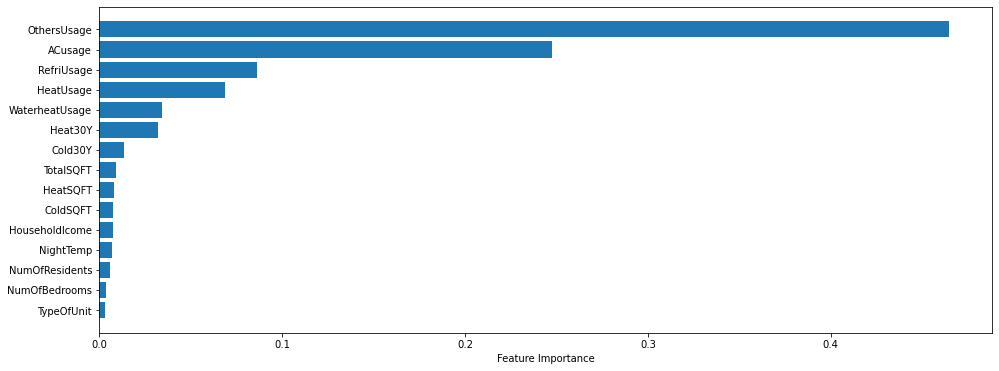

In [26]:
# Plotting the importance
sort = importances.argsort()
plt.figure(figsize=(16, 6))
plt.barh(X.columns[sort], importances[sort])
plt.xlabel("Feature Importance")

## 3. Select important features and normalization

<font color=black size=3 face=Arial> By checking correlation coefficient and random forest regression graphs above, some inconsistent indications between their results can be found. A Random Forest's nonlinear nature can give it a leg up over linear algorithms, making it a better selection. To simplify the question, only 10 features will be selected into model: the top six ranked variables from random forest regression will be included then the rest four features will be selected according to their correlation coefficient. </font>  

<font color=black size=3 face=Arial> So in the following step, the left five variables will be removed from dataframe before training: 'HouseholdIcome', 'NumOfResidents', 'Cold30Y', 'NightTemp', 'HeatUsage'. They seem not provide useful information for predicting the electricity usage, from neither feature selection algorithms. </font>

In [27]:
df_2009_10 = df_2009rclean.drop(['HouseholdIcome','NumOfResidents','Cold30Y','NightTemp', 'HeatUsage'], axis = 1)

<font color=black size=3 face=Arial> In addition, I need to transform all numerical variables into a common scale. This can prevent the variables with large values dominating the machine learning process. All transformations are implemented using Scikit-Learn. </font>

In [28]:
# Normalization
from sklearn import preprocessing
# min-max normalization
scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
normalization = scaler.fit_transform(df_2009_10)

In [29]:
min_max_columns = df_2009_10.columns
df_normalized = pd.DataFrame(normalization, columns=min_max_columns)
df_normalized.head()
df_normalized.describe()

,PowerUsage,NumOfBedrooms,TypeOfUnit,TotalSQFT,HeatSQFT,ColdSQFT,Heat30Y,ACusage,WaterheatUsage,RefriUsage,OthersUsage
count,11460.000000,11460.000000,11460.000000,11460.000000,11460.000000,11460.000000,11460.000000,11460.000000,11460.000000,11460.000000,11460.000000
mean,7.658052,22.120419,40.008726,13.201869,12.332117,9.420402,31.646005,2.810434,5.820045,11.328742,6.398500
std,5.096326,8.005728,28.792721,9.109012,8.582006,8.992625,16.655948,4.076243,4.800238,7.037557,4.650328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.021646,15.384615,25.000000,6.449194,6.514444,2.177700,17.603728,0.265716,2.777250,6.618698,3.415473
50%,6.562631,23.076923,25.000000,11.270466,10.143712,7.836092,34.128833,1.288218,4.591208,9.526583,5.506340
75%,9.985223,23.076923,50.000000,17.266592,15.611322,13.588850,44.200992,3.819967,7.557544,14.246187,8.237784
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [30]:
# It is not necessary to normalize the dependent variable
old = df_normalized['PowerUsage'].tolist()
new = df_2009_10['PowerUsage'].tolist()
df_normalized['PowerUsage']=df_normalized['PowerUsage'].replace(old,new)
df_normalized

,PowerUsage,NumOfBedrooms,TypeOfUnit,TotalSQFT,HeatSQFT,ColdSQFT,Heat30Y,ACusage,WaterheatUsage,RefriUsage,OthersUsage
0,18466.0,30.769231,25.0,30.964879,28.377590,28.731127,36.913710,5.031305,3.564566,13.691485,6.151122
1,5148.0,23.076923,25.0,18.847644,19.463087,19.860627,19.888755,0.298390,10.597262,11.835416,6.919720
2,2218.0,7.692308,100.0,2.549681,3.355705,1.916376,42.836741,0.302234,2.792032,8.271553,1.576444
3,10015.0,23.076923,25.0,11.892263,11.343741,11.781359,43.137402,1.742770,2.266568,15.092141,4.766944
4,2869.0,15.384615,50.0,11.198600,8.797782,0.000000,39.619663,0.000000,4.886496,3.129634,2.003028
...,...,...,...,...,...,...,...,...,...,...,...
11455,16378.0,23.076923,25.0,23.134608,24.467464,24.840302,32.155743,4.419629,2.526660,18.621584,5.421771
11456,7647.0,23.076923,25.0,15.248094,6.018383,6.482288,58.193025,0.160006,2.277479,5.118089,4.046938
11457,9834.0,30.769231,25.0,27.877765,30.004377,30.349884,60.372820,1.390083,8.584451,19.627727,10.021446
11458,4800.0,23.076923,25.0,10.048744,5.806828,3.760163,44.700842,0.222471,4.369831,16.728447,3.019960


# Modelling electricity consumption

## 1. Getting prepared of data for training

In [31]:
# Select target and predict datesets
P = df_normalized.drop(columns= 'PowerUsage') # Predictors
T = df_normalized[['PowerUsage']] #Target

# Splitting the modeling-ready dataset into the Training set and Test set
P_train, P_test, T_train, T_test = train_test_split(P, T, test_size=0.25, random_state=0)

## 2. Model selection : Artificial Neural Networks (ANN) for Regression and fitting

<font color=black size=3 face=Arial> Artificial Neural Networks are one of the deep learning algorithms that simulate the workings of neurons in the human brain. </font>

<font color=black size=3 face=Arial> The Artificial Neural Networks consists of the Input layer, Hidden layers, Output layer. The hidden layer can be more than one in number. Each layer consists of n number of neurons. Each layer will be having an Activation Function associated with each of the neurons. The activation function is the function that is responsible for introducing non-linearity in the relationship. </font>

<font color=black size=3 face=Arial> The advantages of using ANN such as its capability to learn complex behaviour or adaptability, makes it widely used for predictions and pattern recognition. They modify themselves as they learn from initial training and subsequent runs provide more information about the world. </font>

In [32]:
# 1. Installing required librabries
#!pip install tensorflow
!pip install keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split

<font color=black size=3 face=Arial> Every Hyperparameter plays very important role in machine learning -- ANN in case. They specify how many neurons would be in each layer; which technique would be used to initialize the weights in the network; what will be the activation function for each neuron in that layer; how many rows will be passed to the Network at once; how many time ANN would go over the training data etc. In this learning, I assumed the best set of parameters having been used in ANN to simplyfy the process. </font>

In [33]:
# 2. Build the model

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units=10, kernel_initializer='normal', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
model.add(Dense(units = 10, kernel_initializer='normal', activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 10, kernel_initializer='normal', activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1, kernel_initializer='normal'))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(P_train, T_train, batch_size = 10, epochs = 50, verbose=1)

Epoch 1/50
860/860 [==============================] - 1s 961us/step - loss: 94443152.0000
Epoch 2/50
860/860 [==============================] - 1s 1ms/step - loss: 33874868.0000
Epoch 3/50
860/860 [==============================] - 1s 977us/step - loss: 25535384.0000
Epoch 4/50
860/860 [==============================] - 1s 913us/step - loss: 20790648.0000
Epoch 5/50
860/860 [==============================] - 1s 924us/step - loss: 18334662.0000
Epoch 6/50
860/860 [==============================] - 1s 927us/step - loss: 17182806.0000
Epoch 7/50
860/860 [==============================] - 1s 903us/step - loss: 16646990.0000
Epoch 8/50
860/860 [==============================] - 1s 971us/step - loss: 16301579.0000
Epoch 9/50
860/860 [==============================] - 1s 961us/step - loss: 16194464.0000
Epoch 10/50
860/860 [==============================] - 1s 879us/step - loss: 16014568.0000
Epoch 11/50
860/860 [==============================] - 1s 891us/step - loss: 16011823.0000
Epoch 12/5

In [34]:
# 3. Generating Predictions on testing data
T_pred = model.predict(P_test)

90/90 [==============================] - 0s 815us/step


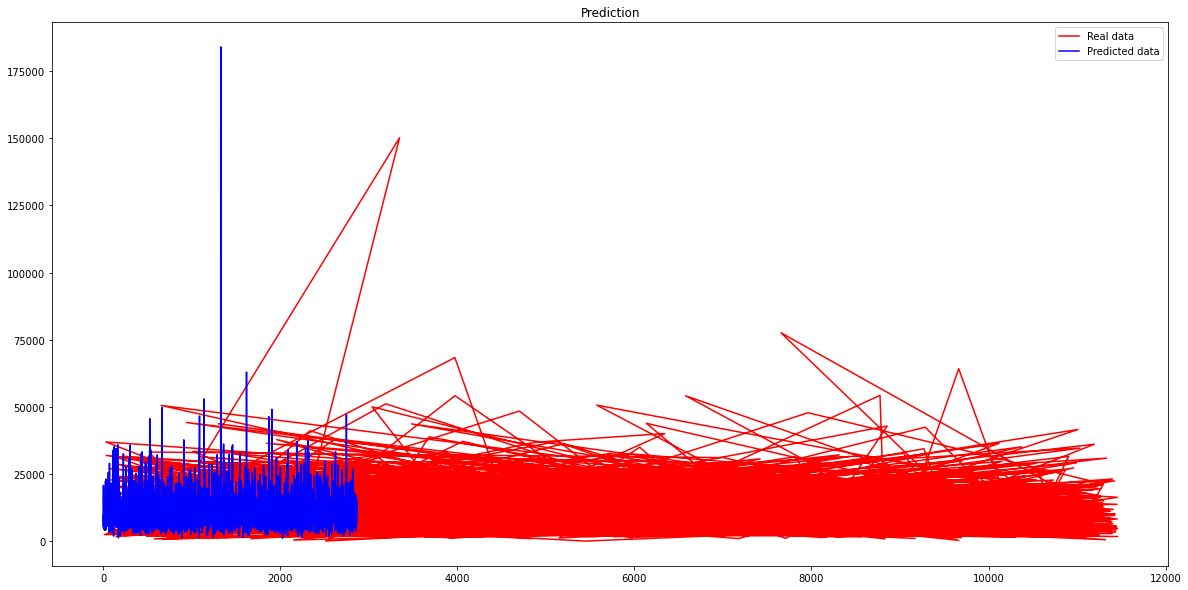

In [35]:
# 4. Plotting prediction and real data
plt.figure(figsize=(20, 10))
plt.plot(T_test, color = 'red', label = 'Real data')
plt.plot(T_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [36]:
# 5. Predicting the electricity consumption on testing data.
P.columns.tolist()
Prediction=pd.DataFrame(data=P_test, columns=P.columns.tolist())
Prediction['PowerUsage']=T_test
Prediction['PredictedUsage']=T_pred
Prediction.head()

,NumOfBedrooms,TypeOfUnit,TotalSQFT,HeatSQFT,ColdSQFT,Heat30Y,ACusage,WaterheatUsage,RefriUsage,OthersUsage,PowerUsage,PredictedUsage
3073,7.692308,100.0,3.099613,3.997666,4.471545,9.125075,5.250412,5.375356,11.748041,2.627485,9891.0,9559.910156
2579,7.692308,100.0,3.462067,4.420776,0.000000,41.310884,0.000000,1.835779,9.290934,1.478792,3512.0,5317.059082
9348,38.461538,25.0,42.369704,20.644879,0.000000,49.496392,0.000000,6.147538,5.539081,3.565688,4287.0,5222.225586
9571,30.769231,25.0,12.285964,11.803327,12.238676,18.129886,7.231509,5.511210,21.293158,9.407736,18580.0,20803.753906
4540,15.384615,0.0,7.061617,8.622702,0.000000,7.681900,0.000000,3.640939,13.678246,9.635745,11313.0,11470.494141


## 3. Model performance evaluation

<font color=black size=3 face=Arial> I will just use accuracy as the metrics to evaluate model performance. Later more metrics can be applied as well as confusion matrix. As it shows, the general accuracy of the prediction is not very ideal (65.59%), indicating that the model is making some errors in the data. </font>

In [37]:
# Computing the absolute percent error
APE=100*(abs(Prediction['PowerUsage']-Prediction['PredictedUsage'])/Prediction['PowerUsage'])
Prediction['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
Prediction.head()

The Accuracy of ANN model is: 66.42313765597699


,NumOfBedrooms,TypeOfUnit,TotalSQFT,HeatSQFT,ColdSQFT,Heat30Y,ACusage,WaterheatUsage,RefriUsage,OthersUsage,PowerUsage,PredictedUsage,APE
3073,7.692308,100.0,3.099613,3.997666,4.471545,9.125075,5.250412,5.375356,11.748041,2.627485,9891.0,9559.910156,3.347385
2579,7.692308,100.0,3.462067,4.420776,0.000000,41.310884,0.000000,1.835779,9.290934,1.478792,3512.0,5317.059082,51.396899
9348,38.461538,25.0,42.369704,20.644879,0.000000,49.496392,0.000000,6.147538,5.539081,3.565688,4287.0,5222.225586,21.815386
9571,30.769231,25.0,12.285964,11.803327,12.238676,18.129886,7.231509,5.511210,21.293158,9.407736,18580.0,20803.753906,11.968536
4540,15.384615,0.0,7.061617,8.622702,0.000000,7.681900,0.000000,3.640939,13.678246,9.635745,11313.0,11470.494141,1.392152


# Conclusion and discussion

<font color=black size=3 face=Arial> This project can be used to fit the Deep Learning ANN regression model on any given dataset. This should be also a good example for predicting electricity consumption but a few things need to be improved: </font>

<font color=black size=3 face=Arial>1. Raw data processing </font>  
<font color=black size=3 face=Arial>A significant amount of variables are deleted since I assumed all '-2' are N/A values and they are over 50% in thoese variables. A deeper consideration into these deleted columns should be suggested since they may be some factors that could contribute to prediction. </font>

<font color=black size=3 face=Arial>2. Feature selection </font>  
<font color=black size=3 face=Arial>Dimensionality reduction from 370 to 15 variables involved my subjective assumption. This might be considered as an uncertained factor in machine learning. Further methods like PCA or LDA could be introduced in future analyses.</font>

<font color=black size=3 face=Arial>3. Hyperparameter tuning  </font>  
<font color=black size=3 face=Arial>For the sake of time, Hyperparameter tuning is not applied in this project. However I would suggest to include it in the future since sometimes it can affect the fit and performance of model a lot. The selection of hyperparameters consists of testing the performance of the model against different combinations of hyperparameters, selecting those that perform best according to a chosen metric and a validation method.  </font> 

<font color=black size=3 face=Arial>4. Model selection </font>   
<font color=black size=3 face=Arial>Low accuracy of prediction may also indicate that the algorithm I selected (ANN) are failing or do not fit for the task. I did some research after and it is noted that ANNs work great when there is a good amount of data. For smaller datasets with less than 50K records, the learning is usually suggested to the supervised ML models like Random Forests, Adaboosts, XGBoosts, etc. </font>   

<font color=black size=3 face=Arial>Additionally, as i mentioned above, more metrics such as sensitivity, specificity precision could be applied to evaluate the quality of the model.</font> 

# Happy Learning!